In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
# Setting the parameters
N = 10000
d = 9

In [4]:

# Building the environment inside a simulation
conversion_rates = [0.05,0.13,0.09,0.16,0.11,0.04,0.20,0.08,0.01]
X = np.array(np.zeros([N,d]))
for i in range(N):
    for j in range(d):
        if np.random.rand() <= conversion_rates[j]:
            X[i,j] = 1

In [10]:
# Implementing Random Selection and Thompson Sampling

#Liste af de valgte strategier som er valgt af Random Selection
strategies_selected_rs = []
total_reward_rs = 0
#Liste af valgte strategier valgt af Thomson Sampling
strategies_selected_ts = []
total_reward_ts = 0

#reward_1 er positiv rewards og rewards_0 er negativ
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d

In [15]:
for i in range(0, N):
    # Vælger random en af strategierne (d = 9)
    strategy_rs = random.randrange(d)
    strategies_selected_rs.append(strategy_rs)    
    reward_rs = X[i, strategy_rs]    
    total_reward_rs = total_reward_rs + reward_rs
    
    # Thompson Sampling
    strategy_ts = 0
    max_random = 0

    for j in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[j] + 1, numbers_of_rewards_0[j] + 1)
        if random_beta > max_random:
            max_random = random_beta
            strategy_ts = j
    reward_ts = X[i, strategy_ts]
    
    if reward_ts == 1:
        numbers_of_rewards_1[strategy_ts] = numbers_of_rewards_1[strategy_ts] + 1
    else:
        numbers_of_rewards_0[strategy_ts] = numbers_of_rewards_0[strategy_ts] + 1
        
    strategies_selected_ts.append(strategy_ts)
    total_reward_ts = total_reward_ts + reward_ts




In [16]:
# Computing the Relative Return
relative_return = (total_reward_ts - total_reward_rs) / total_reward_rs * 100
print("Relative Return: {:.0f} %".format(relative_return))


Relative Return: 103 %


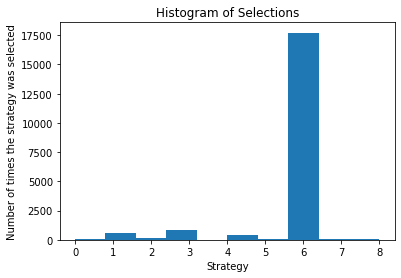

In [17]:
# Plotting the Histogram of Selections
plt.hist(strategies_selected_ts)
plt.title('Histogram of Selections')
plt.xlabel('Strategy')
plt.ylabel('Number of times the strategy was selected')
plt.show()